jupyter program interface on TESS light-curve

In [ ]:
import lightkurve as lk
data = lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')[-1].download().remove_nans()
time = data.time.value
flux = data.flux.value
lc = lk.LightCurve(flux=flux,time=time).remove_outliers(sigma=3).remove_nans()
clean_flux = lc.flux.value
clean_time = lc.time.value
print(clean_flux)

In [ ]:
import lightkurve as lk
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')
print(res)
print(len(res))
for column in res.table.columns:
    print(column)

In [ ]:
import lightkurve as lk
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')[0].download()
print(res)
res.plot(column='pdcsap_flux',label='PSCSAP',normalize=True)
for column in res.columns:
    print(column)
print(len(res))

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC').download_all()
print(res)
print(len(res))
res.plot(column='pdcsap_flux',label='PSCSAP',normalize=True)

fig, ax = plt.subplots(figsize=(20,5))
for lc in res:
  lc.normalize().plot(ax=ax, label=f'Sector {lc.sector}');

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC').download_all()
res.sector
# res.data
# time = res.table.time.value
# flux = res.table.flux.value

In [ ]:
import lightkurve as lk
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC',sector=43)
print(res)

In [ ]:
import lightkurve as lk
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC',sector=None)
print(res)

In [ ]:
import lightkurve as lk
import numpy as np
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')
time_list=[]
mag_list=[]
for i in range(len(res)+1):
    j=i-1
    try:
        data = lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')[j].download().remove_nans()
        time = data.time.value
        flux = data.flux.value
        lc = lk.LightCurve(flux=flux,time=time).remove_outliers(sigma=3).remove_nans()
        clean_flux = lc.flux.value
        clean_time = lc.time.value
        normalized_flux = clean_flux / np.nanmedian(clean_flux)
        mag = -2.5 * np.log10(normalized_flux) + 20.44
        time_list.append(clean_time)
        mag_list.append(mag)
    except Exception as e:
        print(f"surprise Teddy")
print(time_list)
print(mag_list)

In [ ]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import pandas as pd
import csv
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import os
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.timeseries import LombScargle
from symfit import parameters, variables, sin, cos, Fit, Variable, Parameter
%matplotlib inline
res=lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')
time_list=[]
mag_list=[]
for i in range(len(res)+1):
    j=i-1
    try:
        data = lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')[j].download().remove_nans()
        time = data.time.value
        flux = data.flux.value
        lc = lk.LightCurve(flux=flux,time=time).remove_outliers(sigma=3).remove_nans()
        normalized_flux = lc.flux / np.nanmedian(lc.flux)
        mag = -2.5 * np.log10(normalized_flux) + 20.44
        time_list.append(lc.time.value)
        mag_list.append(mag)
    except Exception as e:
        print(f"surprise Teddy")

time_array = np.concatenate(time_list)
mag_array = np.concatenate(mag_list)



fig, ax = plt.subplots(figsize=(5, 3),dpi=300)  
ax.scatter(time_array, mag_array, s=1, c='k')
ax.set_xlabel(r'Time-240000', fontsize=8, fontname='Times New Roman')
ax.set_ylabel(r'$mag$', fontsize=8, fontname='Times New Roman')
ax.xaxis.set_major_locator(MultipleLocator(5))  
ax.yaxis.set_major_locator(MultipleLocator(0.02))  
ax.yaxis.set_minor_locator(MultipleLocator(0.01))  
ax.tick_params(axis='y', which='major', direction='in', length=4, width=0.6, colors='k', grid_color='r', grid_alpha=0.5, labelsize=7)
ax.tick_params(axis='y', which='minor', direction='in', length=2, width=0.6, colors='k', grid_color='r', grid_alpha=0.5, labelsize=7)
ax.tick_params(axis='x', which='major', direction='out', length=4, width=0.6, colors='k', grid_color='r', grid_alpha=0.5, labelsize=7)
ax.tick_params(axis='both', which='both', top=False, bottom=True, left=True, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=False)
for spine in ax.spines.values():
    spine.set_linewidth(0.6)
plt.show()

lcdata1=pd.DataFrame({'hjd':time_array,'mag':mag_array})
mu = np.median(lcdata1.mag)
lcdata2 = lcdata1[np.abs(lcdata1.mag - mu) < 2]  # Change made here
std1 = np.std(lcdata2.mag)
mu2 = np.median(lcdata2.mag)
lcdata3 = lcdata2[np.abs(lcdata2.mag - mu2) < 3 * std1]

sort_idx = np.argsort(lcdata3.hjd)
lcdata4 = lcdata3.iloc[sort_idx]  
sort_hjd = lcdata4.hjd
sort_mag = lcdata4.mag
aa, tb = np.unique(sort_hjd, return_inverse=True)
khjd2 = sort_hjd[np.isin(np.arange(len(sort_hjd)), tb)]
kmag2 = sort_mag[np.isin(np.arange(len(sort_mag)), tb)]

df2=pd.DataFrame({'hjd':khjd2,'mag':kmag2})
df_filtered = df2.dropna(subset=['hjd'])
each_star=df_filtered.to_records(index=False)
# Perform Lomb-Scargle analysis

max_period = 13
min_fre = 1.0 / max_period
max_fre = 0.5 * (1.0 / np.median(np.diff(time)))

# Use Lomb-Scargle method to compute power spectrum
# frequency, power = LombScargle(time, flux).autopower(minimum_frequency=min_frequency, maximum_frequency=max_frequency)
# fap = LombScargle(time, flux).false_alarm_probability(power.max())
f1,p1 = LombScargle(each_star.hjd, each_star.mag).autopower(minimum_frequency=min_fre, maximum_frequency=max_fre)


max_p1 = np.argmax(p1)

f1_final = f1[max_p1]
max_f=max(f1)
min_f=min(f1)
period1 = 1/f1[max_p1]
fig, ax = plt.subplots(figsize=(8, 6), dpi=600)
ax.scatter(f1[max_p1], p1[max_p1], marker='o', color='r', s=20, alpha=1)
ax.plot(f1, p1, color='b', linestyle='-', linewidth=1.2)
ax.set_xlabel('Frequency', fontsize=10, fontname='Times New Roman', color='k')
ax.set_ylabel('PSD', fontsize=10, fontname='Times New Roman', color='k')
ax.spines['left'].set_linewidth(1.0)
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_linewidth(1.0)
ax.spines['right'].set_color('k')
ax.spines['top'].set_linewidth(1.0)
ax.spines['top'].set_color('k')
ax.tick_params(axis='both', which='major', direction='out', length=3, width=0.6, colors='k',grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='both', which='minor', direction='out', length=1.8, width=0.6, colors='k',grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='both', labelsize=5)
ax.set_xlim(min_f,max_f) 
ax.set_ylim(0,p1[max_p1]+0.02) 
ax.minorticks_on()
plt.show()



# 计算相位
phase1 = ((each_star.hjd - each_star.hjd[0])/period1)%1 

def fourier1(t, a0, a1, a2, a3, a4, b1, b2, b3, b4):
    series = a0 + a1*cos(2*np.pi*t) + b1*sin(2*np.pi*t) + a2*cos(4*np.pi*t) + b2*sin(4*np.pi*t) + a3*cos(6*np.pi*t) + b3*sin(6*np.pi*t) + a4*cos(8*np.pi*t) + b4*sin(8*np.pi*t)
    return series

t1, y1 = variables('t1, y1')
model_dict1 = {y1: fourier1(t1, a0=Parameter('a0'), a1=Parameter('a1'), a2=Parameter('a2'), a3=Parameter('a3'), a4=Parameter('a4'), b1=Parameter('b1'), b2=Parameter('b2'), b3=Parameter('b3'), b4=Parameter('b4'))}
fit1 = Fit(model_dict1, t1=np.array(phase1), y1=np.array(each_star.mag))
fit_result1 = fit1.execute()
params = fit_result1.params

residual_mag = each_star.mag - fit1.model(t1=phase1, **fit_result1.params).y1

fig, ax = plt.subplots(figsize=(6, 2.5), dpi=300)
ax.scatter(phase1, each_star.mag, c='b', s=9)
ax.scatter([p+1 for p in phase1], each_star.mag, c='r', s=9)
ax.set_xlabel('HJD', fontsize=6, color='k')
ax.set_ylabel('mag', fontsize=6, color='k')
ax.tick_params(axis='x', which='major', direction='in', length=3, width=0.4, colors='k', grid_color='r', grid_alpha=0)
ax.tick_params(axis='x', which='minor', direction='in', length=1.5, width=0.24, colors='k', grid_color='r', grid_alpha=0)
ax.tick_params(axis='y', which='major', direction='in', length=3, width=0.4, colors='k', grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='y', which='minor', direction='in', length=1.5, width=0.24, colors='k', grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='both', labelsize=4)
ax.invert_yaxis()
t_fit = np.linspace(np.min(phase1), 2*np.max(phase1), 1000)
model_values = fit_result1.model(t1=t_fit, **params)
model_values = np.squeeze(model_values)  
ax.plot(t_fit, model_values, 'g-', label='Fit')

plt.legend()
plt.show()


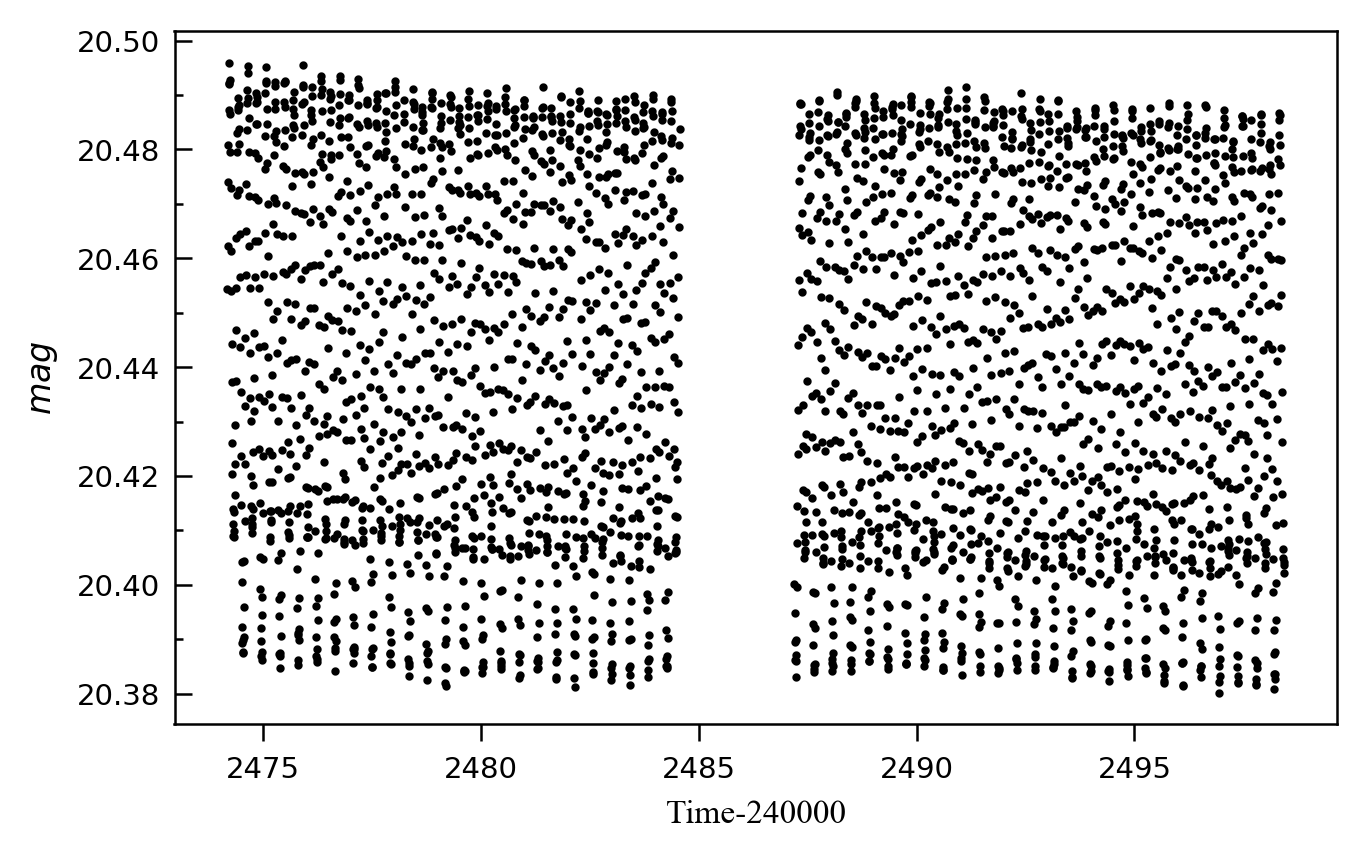

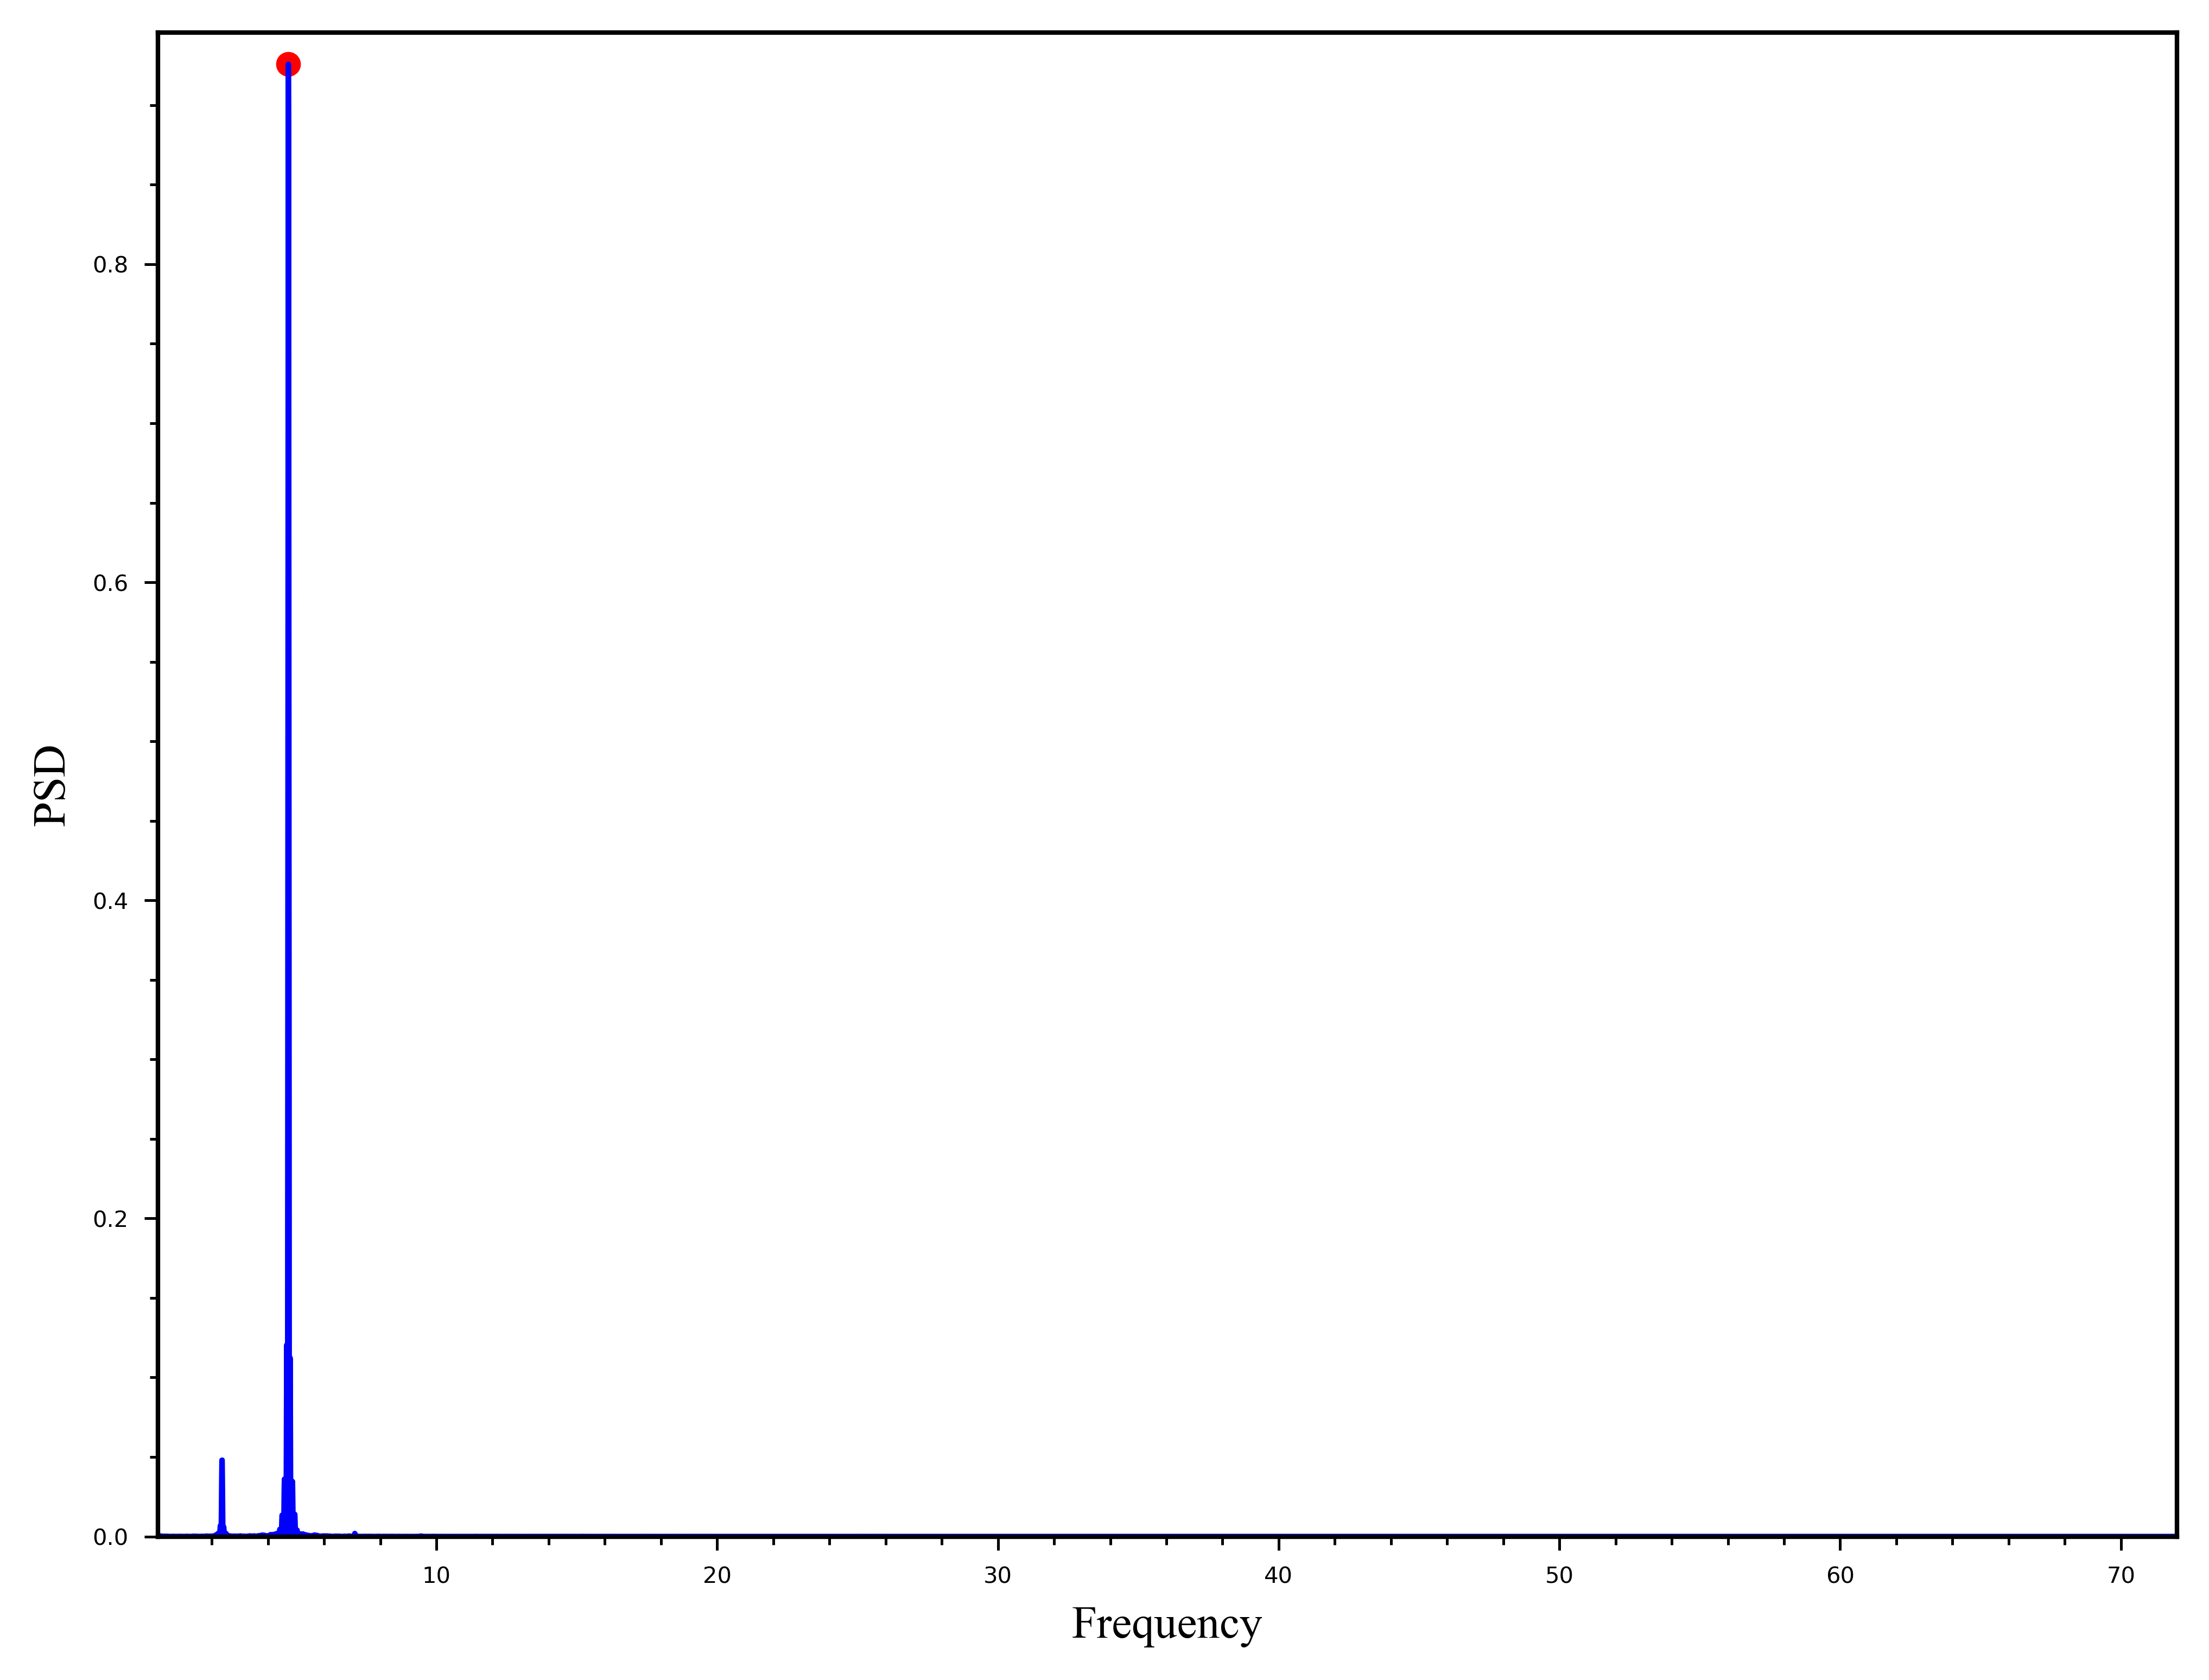

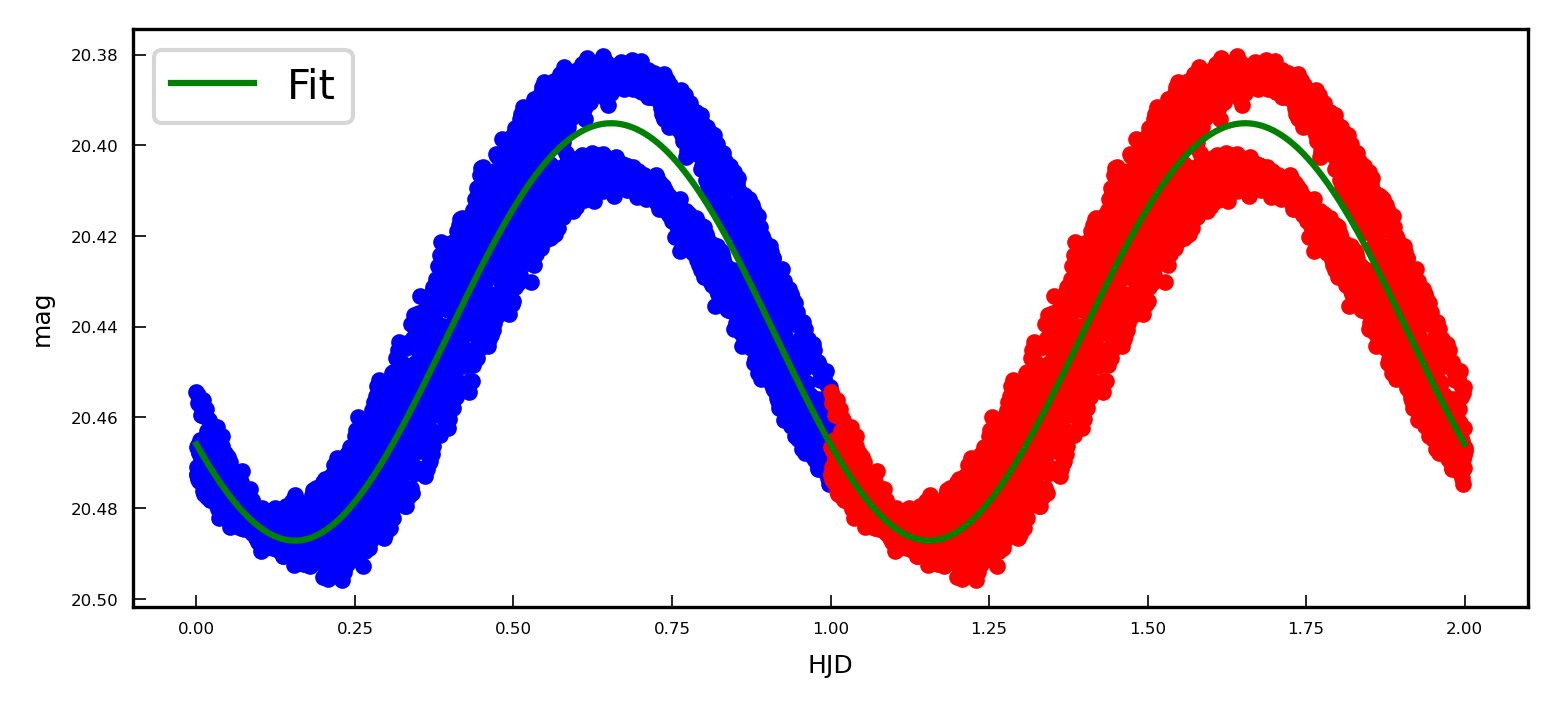

In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import pandas as pd
import csv
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import os
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.timeseries import LombScargle
from symfit import parameters, variables, sin, cos, Fit, Variable, Parameter
%matplotlib inline

data = lk.search_lightcurve('TIC 58636022',mission='TESS',author='TESS-SPOC')[0].download().remove_nans()
time = data.time.value
flux = data.flux.value
lc = lk.LightCurve(flux=flux,time=time).remove_outliers(sigma=3).remove_nans()
normalized_flux = lc.flux / np.nanmedian(lc.flux)
mag = -2.5 * np.log10(normalized_flux) + 20.44



fig, ax = plt.subplots(figsize=(5, 3),dpi=300)  
ax.scatter(time, mag, s=1, c='k')
ax.set_xlabel(r'Time-240000', fontsize=8, fontname='Times New Roman')
ax.set_ylabel(r'$mag$', fontsize=8, fontname='Times New Roman')
ax.xaxis.set_major_locator(MultipleLocator(5))  
ax.yaxis.set_major_locator(MultipleLocator(0.02))  
ax.yaxis.set_minor_locator(MultipleLocator(0.01))  
ax.tick_params(axis='y', which='major', direction='in', length=4, width=0.6, colors='k', grid_color='r', grid_alpha=0.5, labelsize=7)
ax.tick_params(axis='y', which='minor', direction='in', length=2, width=0.6, colors='k', grid_color='r', grid_alpha=0.5, labelsize=7)
ax.tick_params(axis='x', which='major', direction='out', length=4, width=0.6, colors='k', grid_color='r', grid_alpha=0.5, labelsize=7)
ax.tick_params(axis='both', which='both', top=False, bottom=True, left=True, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=False)
for spine in ax.spines.values():
    spine.set_linewidth(0.6)
plt.show()

lcdata1=pd.DataFrame({'hjd':time,'mag':mag})
mu = np.median(lcdata1.mag)
lcdata2 = lcdata1[np.abs(lcdata1.mag - mu) < 2]  # Change made here
std1 = np.std(lcdata2.mag)
mu2 = np.median(lcdata2.mag)
lcdata3 = lcdata2[np.abs(lcdata2.mag - mu2) < 3 * std1]

sort_idx = np.argsort(lcdata3.hjd)
lcdata4 = lcdata3.iloc[sort_idx]  
sort_hjd = lcdata4.hjd
sort_mag = lcdata4.mag
aa, tb = np.unique(sort_hjd, return_inverse=True)
khjd2 = sort_hjd[np.isin(np.arange(len(sort_hjd)), tb)]
kmag2 = sort_mag[np.isin(np.arange(len(sort_mag)), tb)]

df2=pd.DataFrame({'hjd':khjd2,'mag':kmag2})
df_filtered = df2.dropna(subset=['hjd'])
each_star=df_filtered.to_records(index=False)
# Perform Lomb-Scargle analysis

max_period = 13
min_fre = 1.0 / max_period
max_fre = 0.5 * (1.0 / np.median(np.diff(time)))

# Use Lomb-Scargle method to compute power spectrum
# frequency, power = LombScargle(time, flux).autopower(minimum_frequency=min_frequency, maximum_frequency=max_frequency)
# fap = LombScargle(time, flux).false_alarm_probability(power.max())
f1,p1 = LombScargle(each_star.hjd, each_star.mag).autopower(minimum_frequency=min_fre, maximum_frequency=max_fre)


max_p1 = np.argmax(p1)

f1_final = f1[max_p1]
max_f=max(f1)
min_f=min(f1)
period1 = 1/f1[max_p1]
fig, ax = plt.subplots(figsize=(8, 6), dpi=600)
ax.scatter(f1[max_p1], p1[max_p1], marker='o', color='r', s=20, alpha=1)
ax.plot(f1, p1, color='b', linestyle='-', linewidth=1.2)
ax.set_xlabel('Frequency', fontsize=10, fontname='Times New Roman', color='k')
ax.set_ylabel('PSD', fontsize=10, fontname='Times New Roman', color='k')
ax.spines['left'].set_linewidth(1.0)
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_linewidth(1.0)
ax.spines['right'].set_color('k')
ax.spines['top'].set_linewidth(1.0)
ax.spines['top'].set_color('k')
ax.tick_params(axis='both', which='major', direction='out', length=3, width=0.6, colors='k',grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='both', which='minor', direction='out', length=1.8, width=0.6, colors='k',grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='both', labelsize=5)
ax.set_xlim(min_f,max_f) 
ax.set_ylim(0,p1[max_p1]+0.02) 
ax.minorticks_on()
plt.show()



# 计算相位
phase1 = ((each_star.hjd - each_star.hjd[0])/period1)%1 

def fourier1(t, a0, a1, a2, a3, a4, b1, b2, b3, b4):
    series = a0 + a1*cos(2*np.pi*t) + b1*sin(2*np.pi*t) + a2*cos(4*np.pi*t) + b2*sin(4*np.pi*t) + a3*cos(6*np.pi*t) + b3*sin(6*np.pi*t) + a4*cos(8*np.pi*t) + b4*sin(8*np.pi*t)
    return series

t1, y1 = variables('t1, y1')
model_dict1 = {y1: fourier1(t1, a0=Parameter('a0'), a1=Parameter('a1'), a2=Parameter('a2'), a3=Parameter('a3'), a4=Parameter('a4'), b1=Parameter('b1'), b2=Parameter('b2'), b3=Parameter('b3'), b4=Parameter('b4'))}
fit1 = Fit(model_dict1, t1=np.array(phase1), y1=np.array(each_star.mag))
fit_result1 = fit1.execute()
params = fit_result1.params

residual_mag = each_star.mag - fit1.model(t1=phase1, **fit_result1.params).y1

fig, ax = plt.subplots(figsize=(6, 2.5), dpi=300)
ax.scatter(phase1, each_star.mag, c='b', s=9)
ax.scatter([p+1 for p in phase1], each_star.mag, c='r', s=9)
ax.set_xlabel('HJD', fontsize=6, color='k')
ax.set_ylabel('mag', fontsize=6, color='k')
ax.tick_params(axis='x', which='major', direction='in', length=3, width=0.4, colors='k', grid_color='r', grid_alpha=0)
ax.tick_params(axis='x', which='minor', direction='in', length=1.5, width=0.24, colors='k', grid_color='r', grid_alpha=0)
ax.tick_params(axis='y', which='major', direction='in', length=3, width=0.4, colors='k', grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='y', which='minor', direction='in', length=1.5, width=0.24, colors='k', grid_color='r', grid_alpha=0.5)
ax.tick_params(axis='both', labelsize=4)
ax.invert_yaxis()
t_fit = np.linspace(np.min(phase1), 2*np.max(phase1), 1000)
model_values = fit_result1.model(t1=t_fit, **params)
model_values = np.squeeze(model_values)  
ax.plot(t_fit, model_values, 'g-', label='Fit')

plt.legend()
plt.show()


In [ ]:
lightkurve.search_lightcurve(target, radius=None, exptime=None, cadence=None, mission=('Kepler', 'K2', 'TESS'), author=None, quarter=None, month=None, campaign=None, sector=None, limit=None)[source]

In [ ]:
# data_list = []
# normalized_mag_list = []
# normalized_flux_list = []
# for sector in sectors:
#     sector_number = int(sector.split()[-1])  # 提取扇区数
#     data = lk.search_lightcurve(target_name, sector=sector_number).download()

#     if data is None:
#         print(f"No data found for sector {sector_number}")
#         continue

#     data = data.remove_nans()
#     time = data.time.value
#     flux = data.flux.value

#     lc = lk.LightCurve(flux=flux, time=time).remove_outliers(sigma=3).remove_nans()
#     normalized_flux = lc.flux / np.nanmedian(lc.flux)
#     mag = -2.5 * np.log10(normalized_flux) + 20.44

In [ ]:
with open('/Users/qijia/Downloads/tess/tesscurl_sector_81_lc.sh', 'r') as file:
    content = file.read()
print(content)


In [ ]:
import csv
from astropy.io import fits
import threading
import numpy as np
from scipy.optimize import curve_fit
import os
import pandas as pd
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.timeseries import LombScargle
from symfit import parameters, variables, sin, cos, Fit, Variable, Parameter
from sympy import symbols

hdulist = fits.open('/Users/qijia/Downloads/tess/tess2024196212429-s0081-0000000007548817-0276-s_lc.fits')
header = hdulist[0].header
print(header)
ra = header['RA_OBJ'] 
dec = header['DEC_OBJ']  
TESSOIDs=header['OBJECT']


In [ ]:
#download sh 
import os
import requests
from bs4 import BeautifulSoup
import re  # 导入正则表达式库

# 网页 URL
url = "https://archive.stsci.edu/tess/bulk_downloads/bulk_downloads_ffi-tp-lc-dv.html"

# 获取网页内容
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# 定义目标下载目录
download_dir = "/Users/qijia/Downloads/tess/lcsh/"

# 创建下载目录（如果不存在的话）
os.makedirs(download_dir, exist_ok=True)

# 解析所有链接
links = soup.find_all('a')

# 遍历每一个链接
for link in links:
    # 获取链接的 href 属性
    href = link.get('href')
    if href and "tesscurl_sector_" in href and href.endswith("_lc.sh"):
        # 构造完整的文件下载 URL
        download_link = "https://archive.stsci.edu" + href
        
        # 下载文件
        file_response = requests.get(download_link)
        if file_response.status_code == 200:
            file_path = os.path.join(download_dir, os.path.basename(href))  # 获取文件名
            with open(file_path, 'wb') as file:
                file.write(file_response.content)
            print(f"Downloaded {os.path.basename(href)} to {download_dir}")
        else:
            print(f"Failed to download {download_link}, status code: {file_response.status_code}")

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import re  # 导入正则表达式库

# 网页 URL
url = "https://archive.stsci.edu/tess/bulk_downloads/bulk_downloads_ffi-tp-lc-dv.html"

# 获取网页内容
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# 解析所有链接
links = soup.find_all('a')

# 定义基本下载目录
download_dir = "/Users/qijia/Downloads/tess/"

# 遍历每一个链接
for link in links:
    # 获取链接的 href 属性
    href = link.get('href')
    if href and "tesscurl_sector_" in href and href.endswith("_lc.sh"):
        # 构造完整的文件下载 URL
        download_link = "https://archive.stsci.edu" + href
        
        # 使用正则表达式提取 sector number
        match = re.search(r'sector_(\d+)', href)
        if match:
            sector_number = match.group(1)  # 获取匹配的数字部分
            
            # 创建子文件夹名称，格式为 "TESS<sector_number>"
            folder_name = f"TESS{sector_number}"
            folder_path = os.path.join(download_dir, folder_name)
            
            # 创建文件夹
            os.makedirs(folder_path, exist_ok=True)

            # 下载文件
            file_response = requests.get(download_link)
            if file_response.status_code == 200:
                file_path = os.path.join(folder_path, os.path.basename(href))  # 获取文件名
                with open(file_path, 'wb') as file:
                    file.write(file_response.content)
                print(f"Downloaded {os.path.basename(href)} to {folder_path}")
            else:
                print(f"Failed to download {download_link}, status code: {file_response.status_code}")
        else:
            print(f"Could not extract sector number from {href}")

In [ ]:
#downloads sh to a single folder
import os
import re
root_dir = "/Users/qijia/Downloads/tess/" 
tess_folder_pattern = re.compile(r'^TESS\d+$')
for foldername in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, foldername)
    if os.path.isdir(folder_path) and tess_folder_pattern.match(foldername):
        for filename in os.listdir(folder_path):
            if filename.endswith(".sh"):
                file_path = os.path.join(folder_path, filename)                
                try:
                    with open(file_path, 'r') as file:
                        content = file.read()
                        print(f"Contents of {file_path}:\n{content}\n")
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

In [ ]:
#downloads lc to a each folder
import os
import re
import subprocess
root_dir = "/Users/qijia/Downloads/tess/"  # 请修改为你的根目录
tess_folder_pattern = re.compile(r'^TESS\d+$')
for foldername in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, foldername)
    if os.path.isdir(folder_path) and tess_folder_pattern.match(foldername):
        for filename in os.listdir(folder_path):
            if filename.endswith(".sh"):
                file_path = os.path.join(folder_path, filename)
                print(f"Found .sh file in {foldername}: {file_path}")
                try:
                    with open(file_path, 'r') as file:
                        for line in file:
                            if line.strip():
                                command = line.strip()
                                print(f"Executing: {command}")
                                subprocess.run(command, shell=True, cwd=folder_path)
                                
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

In [ ]:
#downloads lc to a each folder

import os
import re
import requests
root_dir = "/Users/qijia/Downloads/tess/"  
tess_folder_pattern = re.compile(r'^TESS\d+$')
for foldername in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, foldername)
    if os.path.isdir(folder_path) and tess_folder_pattern.match(foldername):
        for filename in os.listdir(folder_path):
            if filename.endswith(".sh"):
                file_path = os.path.join(folder_path, filename)
                print(f"Found .sh file in {foldername}: {file_path}")
                try:
                    with open(file_path, 'r') as file:
                        for line in file:
                            if line.strip():
                                command = line.strip()
                                url_match = re.search(r'https?://[^\s]+', command)
                                if url_match:
                                    url = url_match.group(0)
                                    if not os.path.exists(folder_path):
                                        os.makedirs(folder_path)
                    
                                    print(f"Downloading {url} to {folder_path}")
                                    response = requests.get(url, stream=True)
                                    
                                    if response.status_code == 200:
                                        file_name = os.path.join(folder_path, url.split('/')[-1])
                                        with open(file_name, 'wb') as f:
                                            for chunk in response.iter_content(chunk_size=8192):
                                                if chunk:
                                                    f.write(chunk)
                                        print(f"Downloaded: {file_name}")
                                    else:
                                        print(f"Failed to download {url}: {response.status_code}")

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

In [ ]:
#downloads fits to a each folder,fast
import os
import re
import urllib.request
root_dir = "/Users/qijia/Downloads/tess/"
tess_folder_pattern = re.compile(r'^TESS\d+$')
for foldername in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, foldername)
    if os.path.isdir(folder_path) and tess_folder_pattern.match(foldername):
        for filename in os.listdir(folder_path):
            if filename.endswith(".sh"):
                file_path = os.path.join(folder_path, filename)
                print(f"Found .sh file in {foldername}: {file_path}")
                try:
                    with open(file_path, 'r') as file:
                        for line in file:
                            if line.strip():
                                command = line.strip()
                                url_match = re.search(r'https?://[^\s]+', command)
                                if url_match:
                                    url = url_match.group(0)
                                    file_name = os.path.join(folder_path, url.split('/')[-1])
                                    print(f"Downloading {url} to {file_name}")
                                    urllib.request.urlretrieve(url, file_name)
                                    print(f"Downloaded: {file_name}")

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

In [ ]:
#fialed
import os
import re
import requests
from astropy.io import fits
from io import BytesIO
root_dir = "/Users/qijia/Downloads/tess/"
tess_folder_pattern = re.compile(r'^TESS\d+$')
for foldername in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, foldername)
    if os.path.isdir(folder_path) and tess_folder_pattern.match(foldername):
        for filename in os.listdir(folder_path):
            if filename.endswith(".sh"):
                file_path = os.path.join(folder_path, filename)
                try:
                    with open(file_path, 'r') as file:
                        for line in file:
                            if line.strip():
                                command = line.strip()
                                url_match = re.search(r'https?://[^\s]+', command)
                                if url_match:
                                    url = url_match.group(0)
                                    print(f"Accessing {url} for processing...")
                                    response = requests.get(url, stream=True)
                                    if response.status_code == 200:
                                        fits_data = response.content
                                        with BytesIO(fits_data) as fits_file:
                                            with fits.open(fits_file) as hdul:
                                                data = hdulist[1].data
                                                header = hdul[0].header
                                                ra = header['RA_OBJ'] 
                                                dec = header['DEC_OBJ']  
                                                TESSOIDs=header['OBJECT']        
                                                  
                                    else:
                                        print(f"Failed to access {url}: {response.status_code}")
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

In [ ]:
#process in the cyber space
import os
import re
import requests
import pandas as pd
from astropy.io import fits
from io import BytesIO

# 遍历0到99
for i in range(100):
    root_dir = f"/Users/qijia/Downloads/tess/TESS{i}"
    try:
        if os.path.exists(root_dir):
            sectordata = pd.DataFrame(columns=['ra', 'dec', 'tessid'])
            for filename in os.listdir(root_dir):  # 使用 root_dir
                if filename.endswith(".sh"):
                    file_path = os.path.join(root_dir, filename)
                    try:
                        with open(file_path, 'r') as file:
                            for line in file:
                                if line.strip():
                                    command = line.strip()
                                    url_match = re.search(r'https?://[^\s]+', command)
                                    if url_match:
                                        url = url_match.group(0)
                                        response = requests.get(url, stream=True)
                                        if response.status_code == 200:
                                            fits_data = response.content
                                            with BytesIO(fits_data) as fits_file:
                                                with fits.open(fits_file) as hdul:
                                                    data = hdul[1].data
                                                    header = hdul[0].header
                                                    ra = header['RA_OBJ'] 
                                                    dec = header['DEC_OBJ']  
                                                    TESSOIDs = header['OBJECT']        
                                                    sectordata=pd.concat([sectordata, pd.DataFrame({'ra': ra, 'dec': dec, 'tessid': TESSOIDs}, index=[0])], ignore_index=True) 
                                        else:
                                            print(f"Failed to access {url}: {response.status_code}")
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")
            sectordata.to_csv(os.path.join(root_dir, 'sectordata.csv'), index=False)
        else:
            pass
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
#work in the local space
import os
import pandas as pd
from astropy.io import fits
for i in range(100):
    root_dir = f"/Users/qijia/Downloads/tess/TESS{i}"
    try:
        if os.path.exists(root_dir):
            sectordata = pd.DataFrame(columns=['ra', 'dec', 'tessid'])
            for filename in os.listdir(root_dir):  
                if filename.endswith(".fits"):
                    file_path = os.path.join(root_dir, filename)
                    with fits.open(file_path) as hdul:
                        data = hdul[1].data
                        header = hdul[0].header
                        ra = header['RA_OBJ'] 
                        dec = header['DEC_OBJ']  
                        TESSOIDs = header['OBJECT']        
                        sectordata=pd.concat([sectordata, pd.DataFrame({'ra': ra, 'dec': dec, 'tessid': TESSOIDs}, index=[0])], ignore_index=True) 
            output_file = os.path.join(root_dir, f'sectordata{i}.csv')  
            sectordata.to_csv(output_file, index=False)
    except Exception as e:
        print(f"Error processing {root_dir}: {e}")

